In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import scipy as sp
sns.set_style("whitegrid")

## Grafico de Dispersión

In [2]:
df = pd.read_csv('./datasets/pinguinos.csv')
df

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen              39.1             18.7              181.0   
1    Adelie  Torgersen              39.5             17.4              186.0   
2    Adelie  Torgersen              40.3             18.0              195.0   
3    Adelie  Torgersen               NaN              NaN                NaN   
4    Adelie  Torgersen              36.7             19.3              193.0   
..      ...        ...               ...              ...                ...   
339  Gentoo     Biscoe               NaN              NaN                NaN   
340  Gentoo     Biscoe              46.8             14.3              215.0   
341  Gentoo     Biscoe              50.4             15.7              222.0   
342  Gentoo     Biscoe              45.2             14.8              212.0   
343  Gentoo     Biscoe              49.9             16.1              213.0   

     body_mass_g     sex  
0         3750.0    MALE  
1         3800.0  FEMALE  
2         3250.0  FEMALE  
3            NaN     NaN  
4         3450.0  FEMALE  
..           ...     ...  
339          NaN     NaN  
340       4850.0  FEMALE  
341       5750.0    MALE  
342       5200.0  FEMALE  
343       5400.0    MALE  

[344 rows x 7 columns]

In [3]:
df.isna().sum().sort_values(ascending=False)

sex                  10
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
species               0
island                0
dtype: int64

In [4]:
df = df.dropna()

In [5]:
df.shape

(334, 7)

<AxesSubplot:xlabel='flipper_length_mm', ylabel='culmen_length_mm'>

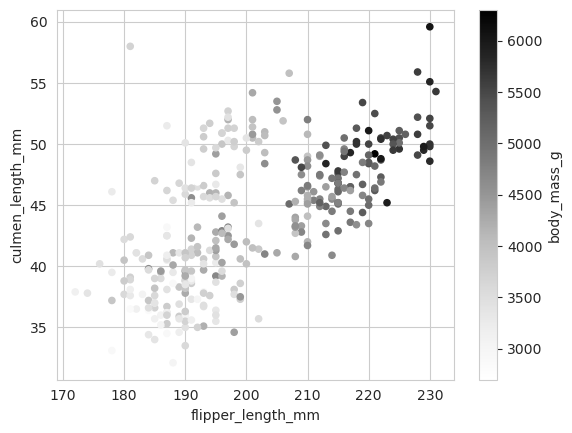

In [6]:
# Graficamos con pandas

df.plot.scatter(
    x = 'flipper_length_mm',
    y = 'culmen_length_mm',
    c='body_mass_g'
)

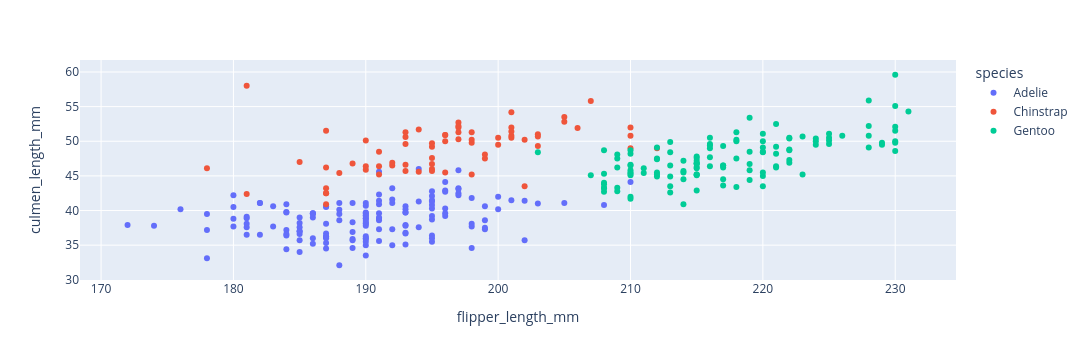

In [7]:
# Graficamos con plotly

fig = px.scatter(
    df,
    x = 'flipper_length_mm',
    y = 'culmen_length_mm',
    color = 'species'
)
fig.show()


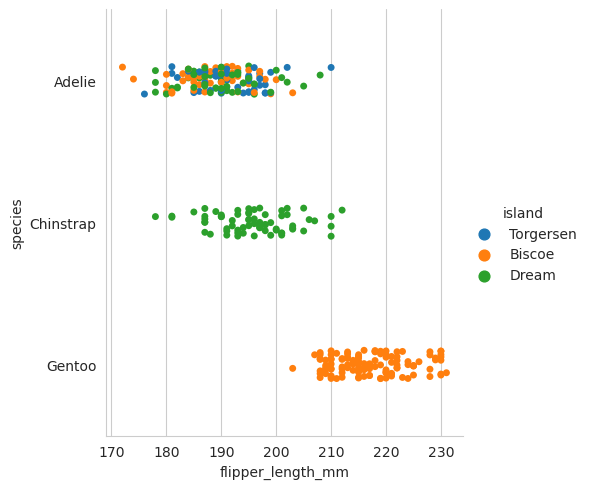

In [8]:
# Graficamos con seaborn

# visualizacion con variable categorica
sns.catplot(
    data = df,
    x = 'flipper_length_mm',
    y = 'species',
    hue = 'island'
)

## Graficos de Regresión

In [9]:
# calculamos coefeciente correlacion lineal entre variables con scipy

r,p = sp.stats.pearsonr(df['flipper_length_mm'],df['culmen_length_mm'])
r,p

(0.6521257442177317, 7.874576982842871e-42)

Text(220, 35, 'r= 0.65')

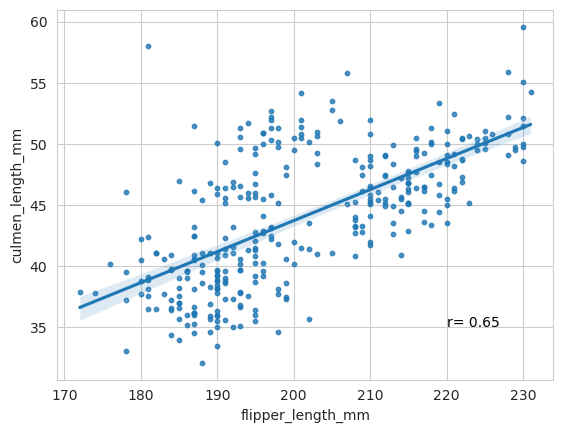

In [10]:
# grafiacamos con seaborn

sns.regplot(
    data = df,
    x = 'flipper_length_mm',
    y = 'culmen_length_mm',
    # reducir tamaño de los puntos
    scatter_kws={
        's':10
    }
)
texto = 'r= ' + str(r)[:4]
plt.text(220,35, texto, color='black')

## Graficos Joinplot


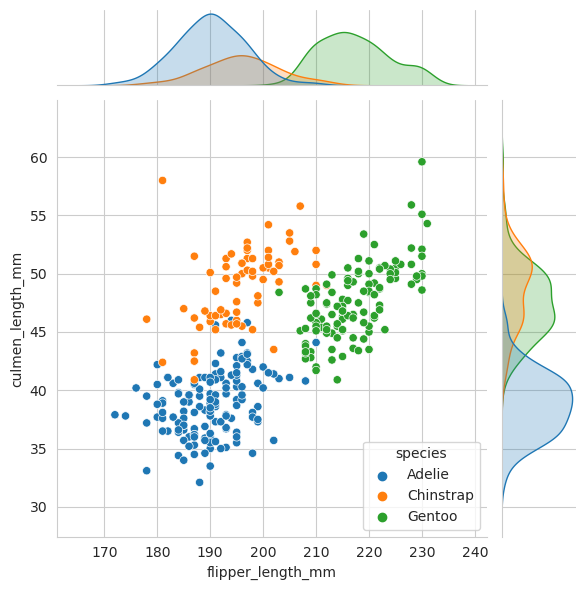

In [11]:
# Graficamos con seaborn

sns.jointplot(
    data = df,
    x = 'flipper_length_mm',
    y = 'culmen_length_mm',
    hue = 'species'
)

## Grafico Pairplot

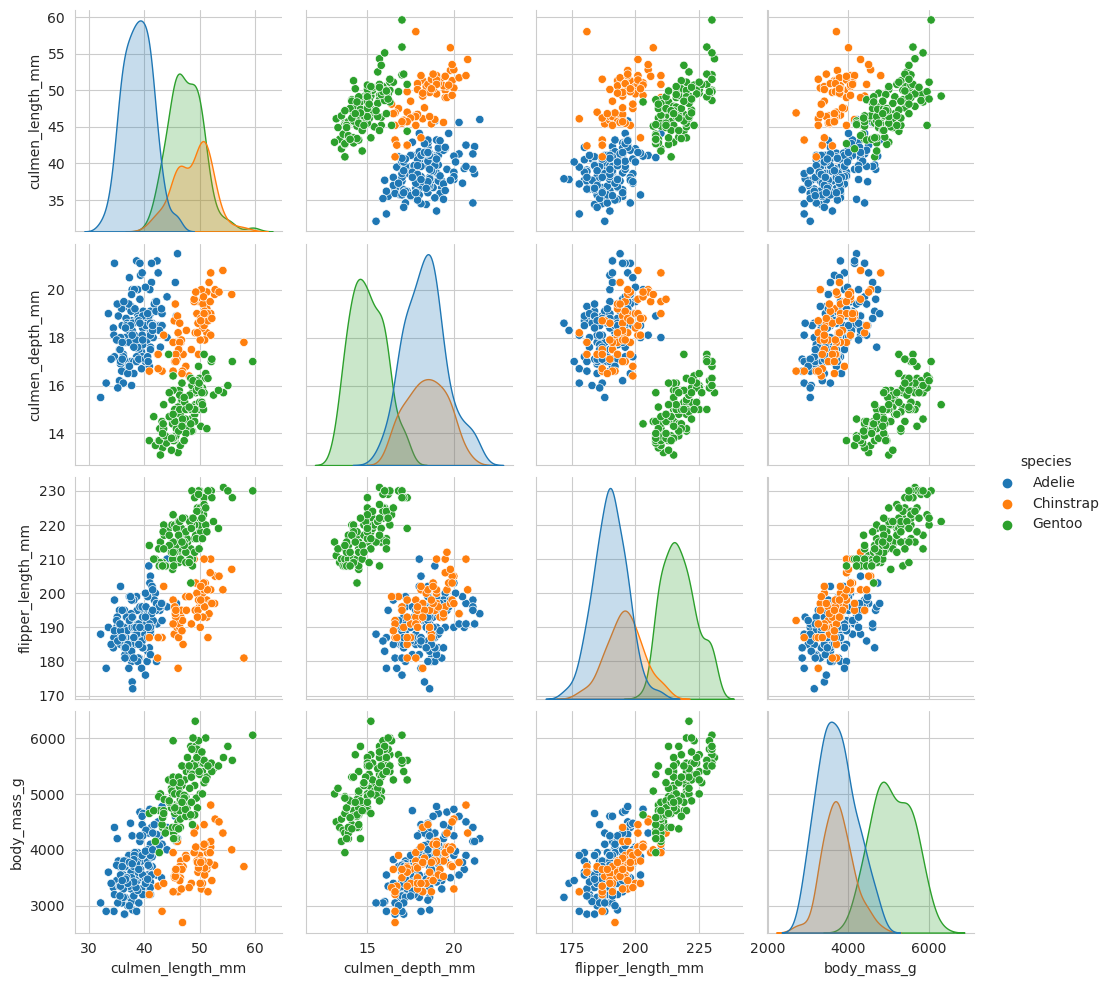

In [12]:
# Graficamos con seaborn

sns.pairplot(
    data= df,
    hue = 'species'
)

## Graficos de Radar

In [13]:
df_radar = pd.read_csv('./datasets/restaurantes.csv')
df_radar

Nombre  Comida  Variedad  Servicio  Ambiente  Precio
0  Restaurante 1       4         4         5         4       3
1  Restaurante 2       5         5         4         5       2
2  Restaurante 3       3         4         5         3       5

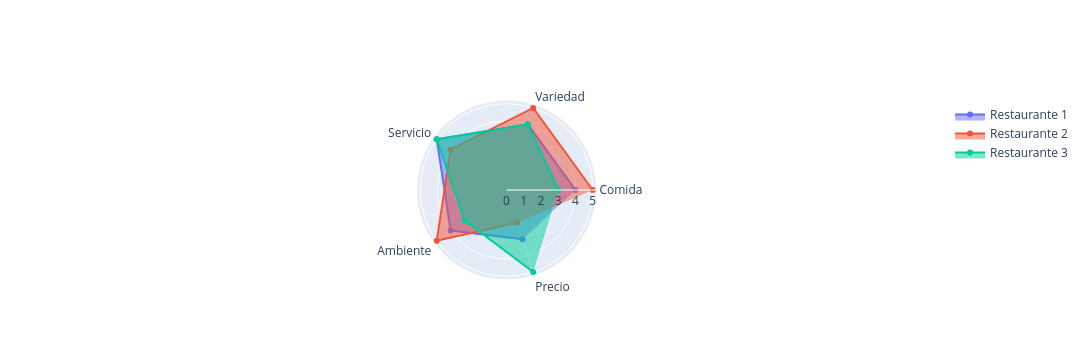

In [14]:
categorias = ['Comida','Variedad','Servicio','Ambiente','Precio']

fig = go.Figure()

fig.add_trace(
    go.Scatterpolar(
        r = df_radar.iloc[0, 1:],
        theta = categorias,
        fill= 'toself',
        name = 'Restaurante 1'
    )
)
fig.add_trace(
    go.Scatterpolar(
        r = df_radar.iloc[1, 1:],
        theta = categorias,
        fill= 'toself',
        name = 'Restaurante 2'
    )
)
fig.add_trace(
    go.Scatterpolar(
        r = df_radar.iloc[2, 1:],
        theta = categorias,
        fill= 'toself',
        name = 'Restaurante 3'
    )
)
fig.show()

Comparar medida promedio de las tres especies de pinguinos

In [15]:
agrupado_pinguinos = df.groupby('species').mean()
agrupado_pinguinos


culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
species                                                                     
Adelie            38.823973        18.347260         190.102740  3706.164384
Chinstrap         48.833824        18.420588         195.823529  3733.088235
Gentoo            47.542500        15.002500         217.233333  5090.625000

In [16]:
categorias_pinguinos = agrupado_pinguinos.columns

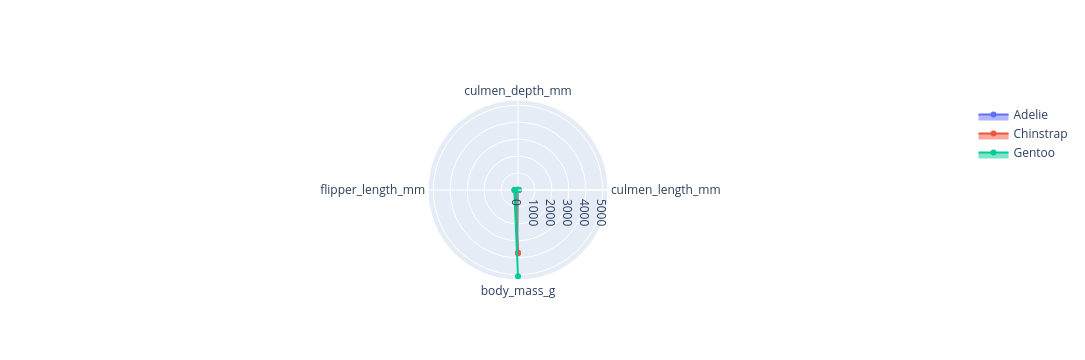

In [17]:
fig = go.Figure()

fig.add_trace(
    go.Scatterpolar(
        r = agrupado_pinguinos.iloc[0, :],
        theta = categorias_pinguinos,
        fill= 'toself',
        name = 'Adelie'
    )
)
fig.add_trace(
    go.Scatterpolar(
        r = agrupado_pinguinos.iloc[1, :],
        theta = categorias_pinguinos,
        fill= 'toself',
        name = 'Chinstrap'
    )
)
fig.add_trace(
    go.Scatterpolar(
        r = agrupado_pinguinos.iloc[2, :],
        theta = categorias_pinguinos,
        fill= 'toself',
        name = 'Gentoo'
    )
)
fig.show()

Se requiere normalizar los valores de las variables

In [18]:
df2 = df[categorias_pinguinos]
df_norm = (df2-df2.min())/(df2.max()-df2.min())
df_norm['species'] = df['species']
df_norm

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g species
0            0.254545         0.666667           0.152542     0.291667  Adelie
1            0.269091         0.511905           0.237288     0.305556  Adelie
2            0.298182         0.583333           0.389831     0.152778  Adelie
4            0.167273         0.738095           0.355932     0.208333  Adelie
5            0.261818         0.892857           0.305085     0.263889  Adelie
..                ...              ...                ...          ...     ...
338          0.549091         0.071429           0.711864     0.618056  Gentoo
340          0.534545         0.142857           0.728814     0.597222  Gentoo
341          0.665455         0.309524           0.847458     0.847222  Gentoo
342          0.476364         0.202381           0.677966     0.694444  Gentoo
343          0.647273         0.357143           0.694915     0.750000  Gentoo

[334 rows x 5 columns]

In [19]:
agrupado_norm = df_norm.groupby('species').mean()
agrupado_norm

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
species                                                                     
Adelie             0.244508         0.624674           0.306826     0.279490
Chinstrap          0.608503         0.633403           0.403789     0.286969
Gentoo             0.561545         0.226488           0.766667     0.664062

In [20]:
adelie2 = list(agrupado_norm.loc['Adelie', :])
chinstrap2 = list(agrupado_norm.loc['Chinstrap', :])
gentoo2 = list(agrupado_norm.loc['Gentoo', :])

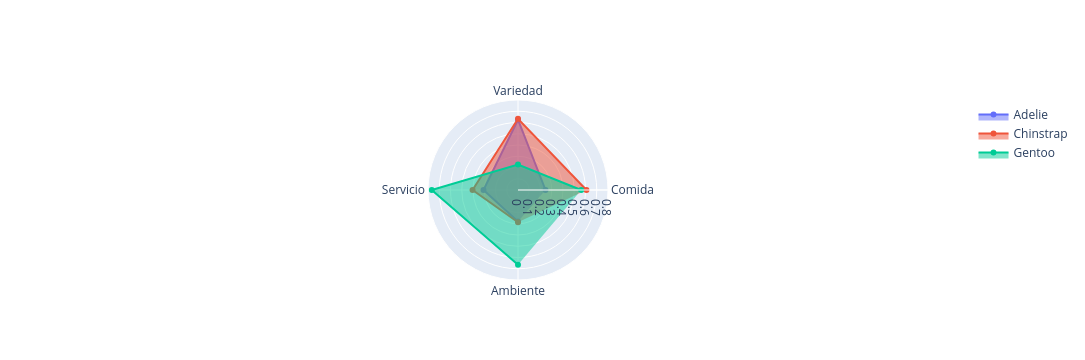

In [21]:
# Radar Chart con Plotly
# https://plotly.com/python/radar-chart/
fig = go.Figure()
fig.add_trace(go.Scatterpolar(
      r=adelie2,
      theta=categorias,
      fill='toself',
      name='Adelie'
))

fig.add_trace(go.Scatterpolar(
      r=chinstrap2,
      theta=categorias,
      fill='toself',
      name='Chinstrap'
))

fig.add_trace(go.Scatterpolar(
      r=gentoo2,
      theta=categorias,
      fill='toself',
      name='Gentoo'
))

fig.show()

## Graficos de Borbujas

In [22]:
df_paises = pd.read_csv('./datasets/paises_vida.csv', index_col='index')
df_paises = df_paises.dropna()
df_paises

country continent  year  lifeExp       pop   gdpPercap iso_alpha  \
index                                                                         
0      Afghanistan      Asia  1952   28.801   8425333  779.445314       AFG   
1      Afghanistan      Asia  1957   30.332   9240934  820.853030       AFG   
2      Afghanistan      Asia  1962   31.997  10267083  853.100710       AFG   
3      Afghanistan      Asia  1967   34.020  11537966  836.197138       AFG   
4      Afghanistan      Asia  1972   36.088  13079460  739.981106       AFG   
...            ...       ...   ...      ...       ...         ...       ...   
1699      Zimbabwe    Africa  1987   62.351   9216418  706.157306       ZWE   
1700      Zimbabwe    Africa  1992   60.377  10704340  693.420786       ZWE   
1701      Zimbabwe    Africa  1997   46.809  11404948  792.449960       ZWE   
1702      Zimbabwe    Africa  2002   39.989  11926563  672.038623       ZWE   
1703      Zimbabwe    Africa  2007   43.487  12311143  469.709298       ZWE   

       iso_num  
index           
0            4  
1            4  
2            4  
3            4  
4            4  
...        ...  
1699       716  
1700       716  
1701       716  
1702       716  
1703       716  

[1704 rows x 8 columns]

¿Encontrar si existe una correlacion entre la espectativa de vida, el producto interno bruto,  y la poblacion de los paises en el año 2002?

In [23]:
df_2002 = df_paises[df_paises['year'] == 2002]
df_2002

country continent  year  lifeExp       pop    gdpPercap  \
index                                                                       
10            Afghanistan      Asia  2002   42.129  25268405   726.734055   
22                Albania    Europe  2002   75.651   3508512  4604.211737   
34                Algeria    Africa  2002   70.994  31287142  5288.040382   
46                 Angola    Africa  2002   41.003  10866106  2773.287312   
58              Argentina  Americas  2002   74.340  38331121  8797.640716   
...                   ...       ...   ...      ...       ...          ...   
1654              Vietnam      Asia  2002   73.017  80908147  1764.456677   
1666   West Bank and Gaza      Asia  2002   72.370   3389578  4515.487575   
1678          Yemen, Rep.      Asia  2002   60.308  18701257  2234.820827   
1690               Zambia    Africa  2002   39.193  10595811  1071.613938   
1702             Zimbabwe    Africa  2002   39.989  11926563   672.038623   

      iso_alpha  iso_num  
index                     
10          AFG        4  
22          ALB        8  
34          DZA       12  
46          AGO       24  
58          ARG       32  
...         ...      ...  
1654        VNM      704  
1666        PSE      275  
1678        YEM      887  
1690        ZMB      894  
1702        ZWE      716  

[142 rows x 8 columns]

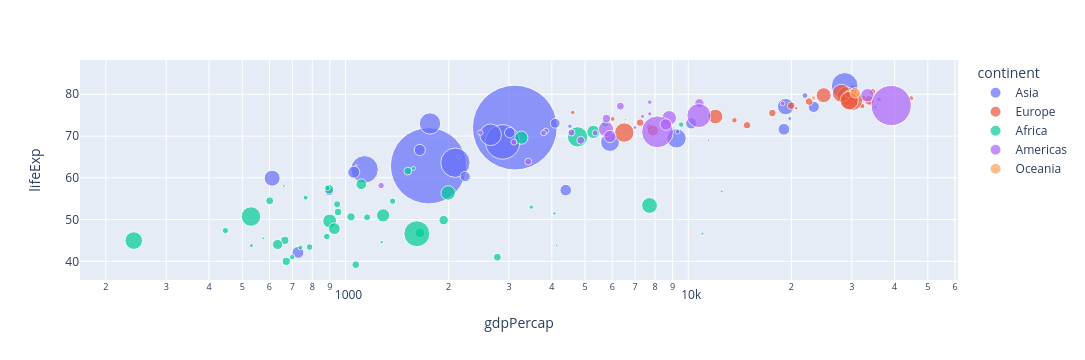

In [24]:
# Graficamos en plotly

fig = px.scatter(
    df_2002,
    x='gdpPercap',
    y='lifeExp',
    size='pop',
    size_max=60,
    log_x=True, # escala logaritmica ver grafico con dist exponencial en forma lineal
    color='continent',
    hover_name='country'
)

fig.show()

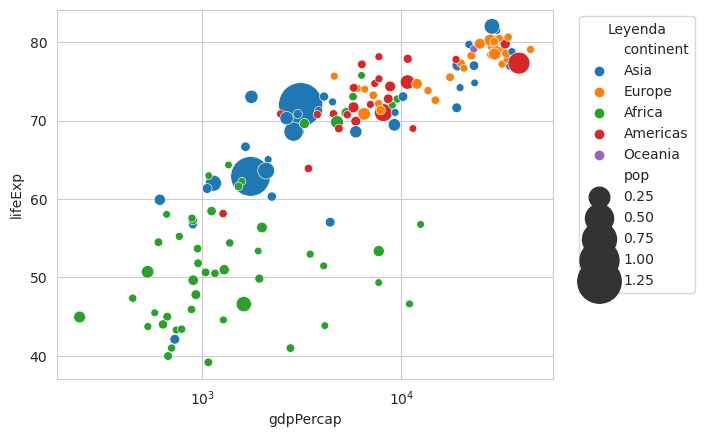

In [25]:
# Graficamos con seaborn

sns.scatterplot(
    data = df_2002,
    x='gdpPercap',
    y='lifeExp',
    size='pop',
    hue='continent',
    sizes=(30,1000),
    legend=True
)

plt.xscale('log')
plt.legend(bbox_to_anchor=(1.3,1),loc='upper right', title='Leyenda')

## Graficos de Lineas Dobles

¿Analizar en Asia como ha cambiado la expectativa de vida y el GDP per Capita?

In [26]:
df_asia = df_paises[df_paises['continent']== 'Asia'] # filtramos paises de Asia
df_asia_agrupado = df_asia.groupby('year').agg({
    'lifeExp':'mean',
    'gdpPercap':'mean'
    
})# agrupamos por año

df_asia_agrupado

lifeExp     gdpPercap
year                         
1952  46.314394   5195.484004
1957  49.318544   5787.732940
1962  51.563223   5729.369625
1967  54.663640   5971.173374
1972  57.319269   8187.468699
1977  59.610556   7791.314020
1982  62.617939   7434.135157
1987  64.851182   7608.226508
1992  66.537212   8639.690248
1997  68.020515   9834.093295
2002  69.233879  10174.090397
2007  70.728485  12473.026870

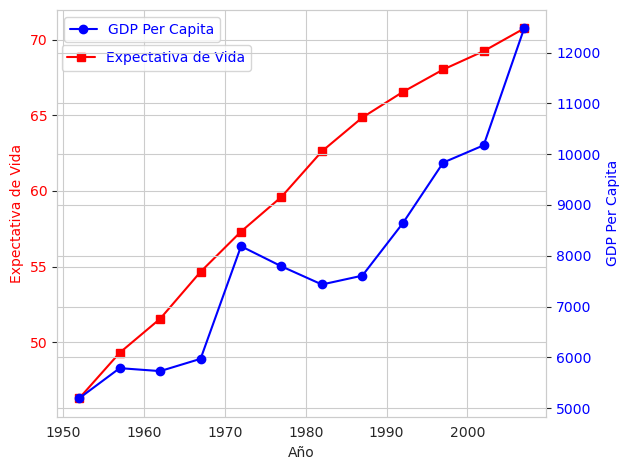

In [27]:
# Graficamos con matplolib

fig, ax1 = plt.subplots()

ax1.set_xlabel('Año')
ax1.set_ylabel('Expectativa de Vida', color='red')
ax1.plot(    
    df_asia_agrupado.index.values, 
    df_asia_agrupado['lifeExp'],  
    color='red',
    marker='s'
)
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()

ax2.set_ylabel('GDP Per Capita', color='blue')  
ax2.plot(
    df_asia_agrupado.index.values, 
    df_asia_agrupado['gdpPercap'], 
    color='blue',
    marker='o'
)
ax2.tick_params(axis='y', labelcolor='blue')

ax2.legend(
    title='',
    labels=['GDP Per Capita'],
    labelcolor=['blue']
)

ax1.legend(
    bbox_to_anchor=(0.41,0.93),
    title='',
    labels=['Expectativa de Vida'],
    labelcolor=['blue']
)

fig.tight_layout()  
plt.show()

## Graficos de Barras y Lineas

¿Visualizar como ha cambiado a lo largo de los años la expectativa de vida y el GPD percapita promedio del contiente africano?

In [28]:
df_paises.head()

country continent  year  lifeExp       pop   gdpPercap iso_alpha  \
index                                                                         
0      Afghanistan      Asia  1952   28.801   8425333  779.445314       AFG   
1      Afghanistan      Asia  1957   30.332   9240934  820.853030       AFG   
2      Afghanistan      Asia  1962   31.997  10267083  853.100710       AFG   
3      Afghanistan      Asia  1967   34.020  11537966  836.197138       AFG   
4      Afghanistan      Asia  1972   36.088  13079460  739.981106       AFG   

       iso_num  
index           
0            4  
1            4  
2            4  
3            4  
4            4

In [30]:
df_africa = df_paises[df_paises['continent']== 'Africa']
df_africa 

country continent  year  lifeExp       pop    gdpPercap iso_alpha  \
index                                                                       
24      Algeria    Africa  1952   43.077   9279525  2449.008185       DZA   
25      Algeria    Africa  1957   45.685  10270856  3013.976023       DZA   
26      Algeria    Africa  1962   48.303  11000948  2550.816880       DZA   
27      Algeria    Africa  1967   51.407  12760499  3246.991771       DZA   
28      Algeria    Africa  1972   54.518  14760787  4182.663766       DZA   
...         ...       ...   ...      ...       ...          ...       ...   
1699   Zimbabwe    Africa  1987   62.351   9216418   706.157306       ZWE   
1700   Zimbabwe    Africa  1992   60.377  10704340   693.420786       ZWE   
1701   Zimbabwe    Africa  1997   46.809  11404948   792.449960       ZWE   
1702   Zimbabwe    Africa  2002   39.989  11926563   672.038623       ZWE   
1703   Zimbabwe    Africa  2007   43.487  12311143   469.709298       ZWE   

       iso_num  
index           
24          12  
25          12  
26          12  
27          12  
28          12  
...        ...  
1699       716  
1700       716  
1701       716  
1702       716  
1703       716  

[624 rows x 8 columns]

In [33]:
df_agrupado_africa=df_africa.groupby('year').agg({
    'lifeExp':'mean',
    'pop':'sum',
    'gdpPercap': 'mean'
})
df_agrupado_africa = df_agrupado_africa.reset_index()
df_agrupado_africa

year    lifeExp        pop    gdpPercap
0   1952  39.135500  237640501  1252.572466
1   1957  41.266346  264837738  1385.236062
2   1962  43.319442  296516865  1598.078825
3   1967  45.334538  335289489  2050.363801
4   1972  47.450942  379879541  2339.615674
5   1977  49.580423  433061021  2585.938508
6   1982  51.592865  499348587  2481.592960
7   1987  53.344788  574834110  2282.668991
8   1992  53.629577  659081517  2281.810333
9   1997  53.598269  743832984  2378.759555
10  2002  53.325231  833723916  2599.385159
11  2007  54.806038  929539692  3089.032605

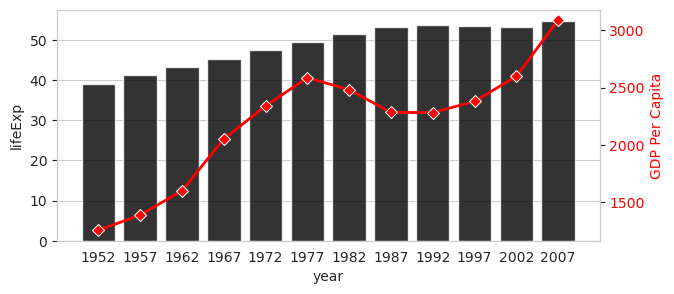

In [44]:
# Graficamos con saborn

fig, ax1 = plt.subplots(figsize=(7,3))

sns.barplot(
    data = df_agrupado_africa,
    x='year',
    y='lifeExp',
    color='Black',
    alpha=0.8,
    ax=ax1
)

ax2 = ax1.twinx()

sns.lineplot(
    data=df_agrupado_africa['gdpPercap'],
    ax=ax2,
    color='red',
    linewidth=2,
    marker='D'
    
)

ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylabel('GDP Per Capita', color = 'red')
ax2.grid(visible=False)

## Graficos de Mapa de Calor

<AxesSubplot:xlabel='flipper_length_mm', ylabel='culmen_length_mm'>

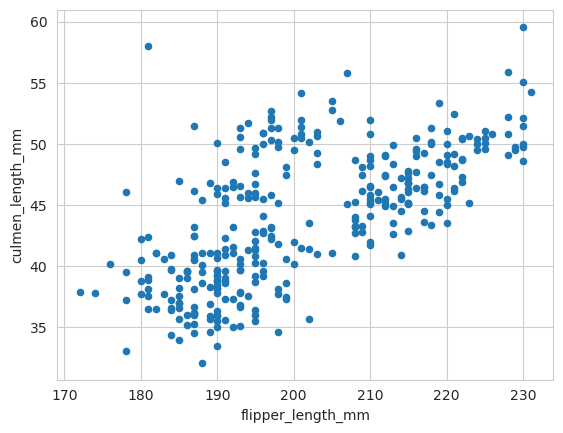

In [45]:
# Graficamos con pandas dataset pinguinos

df.plot.scatter(
    x = 'flipper_length_mm',
    y = 'culmen_length_mm',   
)

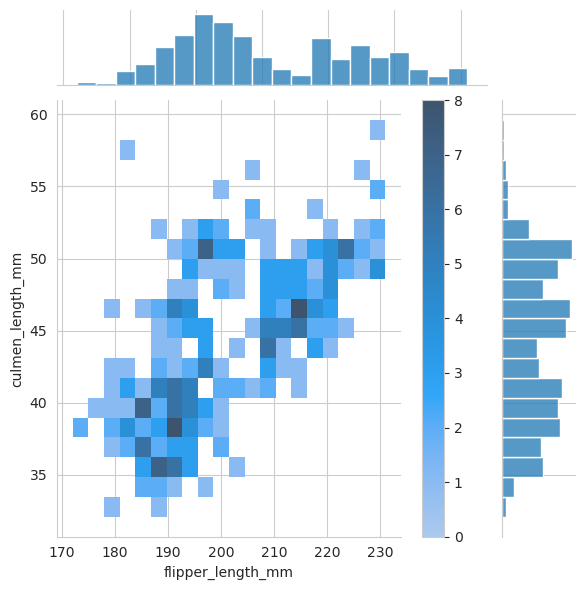

In [51]:
sns.jointplot(
    data=df,
    x = 'flipper_length_mm',
    y = 'culmen_length_mm',
    kind='hist',
    joint_kws={
        'bins':20
    },
    marginal_kws={
        "bins":20, 
        "fill":True
    },
    cbar=True
)